<a href="https://colab.research.google.com/github/nkongenelly/ArtificialIntelligence/blob/classifyImages/classifyCllothingImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Tensorflow and tf.keras
import tensorflow as tf

#Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

# print("TensorFlow version:", tf.__version__)

In [80]:
# import the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# print(test_images.shape)

# Load the data class namews/ images labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(len(test_labels))  
# test_labels.shape   

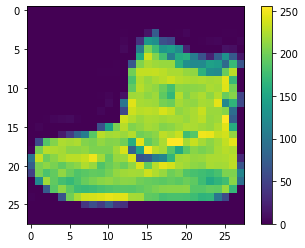

In [81]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


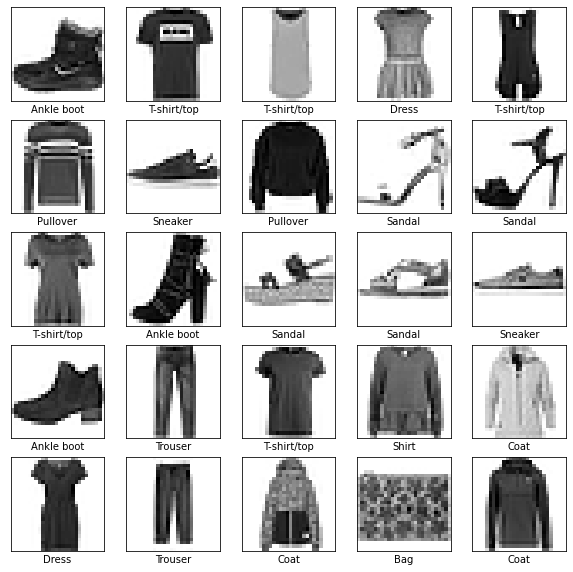

In [82]:
# Scale thesee values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# To verify that the data is in the correct format and that you're ready to build and
#  train the network, let's display the first 25 images from the training set and 
# display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()



In [83]:
# Build the model
# Setup the layers
model = tf.keras.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)), #transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
  tf.keras.layers.Dense(128, activation='relu'), # Dense means fully connected neural layers, all the nodes, or neurons, in one layer are connected to the neurons in the next layer (it's input is from the final Pooling/ Convolution layer which is flattened)
  tf.keras.layers.Dense(10) #last layer returns a logit (function that represents probability values from 0 to 1, and negative infinity to infinity) array with length of 10 -score for each of the output node 
])
# model

In [84]:
# Compile the model - Before the model is ready for training, it needs a few more 
# settings i.e, loss function, Optimizer, metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model

In [85]:
# Train the model with the following 4 steps
#  1). Feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4968 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3748 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3372 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3115 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2486 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.241

In [86]:
#  2). Evaluate accuracy by comparing how it performs on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# It turns out that the accuracy on the test dataset is a little less than the 
# accuracy on the training dataset. This gap between training accuracy and test 
# accuracy represents overfitting. Overfitting happens when a machine learning 
# model performs worse on new, previously unseen inputs than it does on the 
# training data. 

313/313 - 1s - loss: 0.3520 - accuracy: 0.8756 - 597ms/epoch - 2ms/step

Test accuracy: 0.8755999803543091


In [87]:
#  3). Make predictions - Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images) # Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction

predictions[0] #A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:
np.argmax(predictions[0]) # So, the model is most confident that this image is an ankle boot, or class_names[9]

# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format (class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

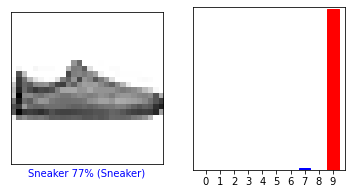

In [88]:
#  4). Verify predictions
# Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[0], test_labels)
plt.show()

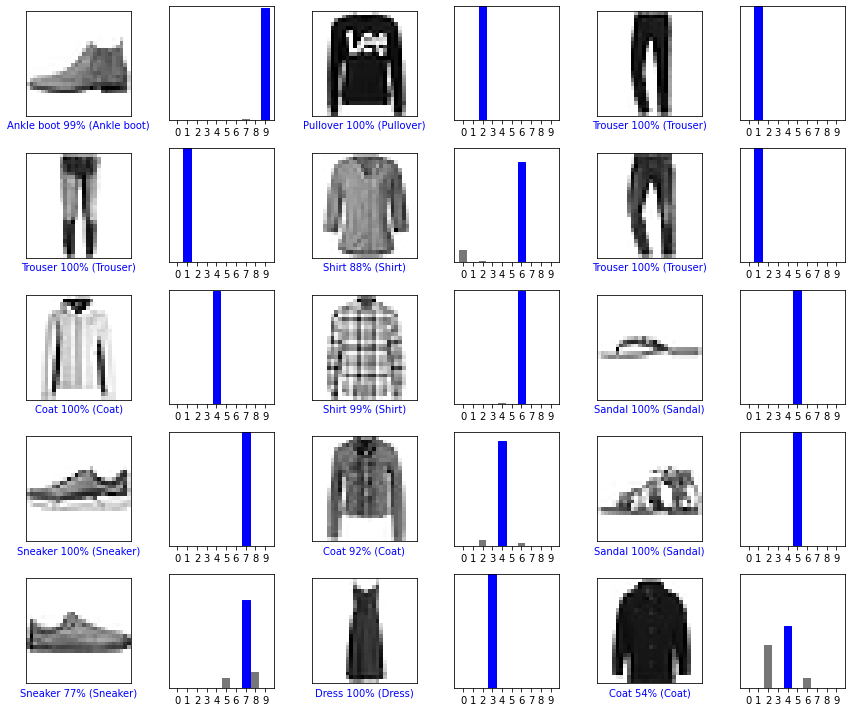

In [89]:
# Let's plot several images with their predictions. Note that the model can be wrong even when very confident
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images= num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[1.8495128e-05 1.3413745e-15 9.9950171e-01 8.1359347e-10 2.3786261e-04
  4.3103472e-12 2.4188482e-04 1.8783538e-14 1.4733215e-11 4.7558377e-12]]


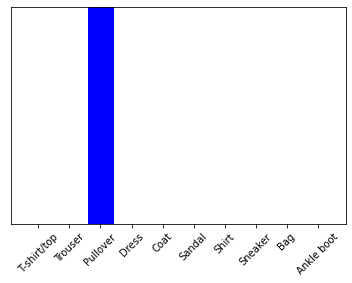

'Pullover'

In [91]:
# Use the trained model to make prediction for a single image
img = test_images[1]
print(img.shape)

# tf.keras models are optimized to make predictions on a batch, or collection, 
# of examples at once. Accordingly, even though you're using a single image, 
# you need to add it to a list:
img = (np.expand_dims(img, 0))

print(img.shape)

# Now predict the correct label for this image:
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

# tf.keras.Model.predict returns a list of lists—one list for each image in the 
# batch of data. Grab the predictions for our (only) image in the batch:
class_names[np.argmax(predictions_single[0])]